In [1]:
import pandas as pd

df_raw = pd.read_csv("../data/complaints.csv", usecols=["Product"])
print(df_raw['Product'].dropna().str.strip().str.lower().unique())


['credit reporting or other personal consumer reports' 'debt collection'
 'credit card' 'checking or savings account'
 'money transfer, virtual currency, or money service'
 'vehicle loan or lease' 'debt or credit management' 'mortgage'
 'payday loan, title loan, personal loan, or advance loan' 'prepaid card'
 'student loan' 'credit reporting'
 'credit reporting, credit repair services, or other personal consumer reports'
 'credit card or prepaid card' 'payday loan, title loan, or personal loan'
 'bank account or service' 'money transfers' 'consumer loan' 'payday loan'
 'other financial service' 'virtual currency']


 Starting chunked preprocessing...
 Processing chunk 1...
 Processing chunk 2...
 Processing chunk 3...
 Processing chunk 4...
 Processing chunk 5...
 Processing chunk 6...
 Processing chunk 7...
 Processing chunk 8...
 Processing chunk 9...
 Processing chunk 10...
 Processing chunk 11...
 Processing chunk 12...
 Processing chunk 13...
 Processing chunk 14...
 Processing chunk 15...
 Processing chunk 16...
 Processing chunk 17...
 Processing chunk 18...
 Processing chunk 19...
 Processing chunk 20...
 Processing chunk 21...
 Processing chunk 22...
 Processing chunk 23...
 Processing chunk 24...
 Processing chunk 25...
 Processing chunk 26...
 Processing chunk 27...
 Processing chunk 28...
 Processing chunk 29...
 Processing chunk 30...
 Processing chunk 31...
 Processing chunk 32...
 Processing chunk 33...
 Processing chunk 34...
 Processing chunk 35...
 Processing chunk 36...
 Processing chunk 37...
 Processing chunk 38...
 Processing chunk 39...
 Processing chunk 40...
 Processing ch

/home/nurye/Desktop/10_Academy/week_6/Intelligent-Complaint-Analysis-for-Financial-Services/notebook/../src/data_preprocessing.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_final['product'], order=df_final['product'].value_counts().index, palette="Set2")


 Saved product distribution plot to: plots/product_distribution.png


,complaint_id,product,cleaned_narrative
0,14069121,Credit card,a xxxx xxxx card was opened under my name by a...
1,14061897,Savings account,i made the mistake of using my wellsfargo debi...
2,14047085,Credit card,dear cfpb i have a secured credit card with ci...
3,14040217,Credit card,i have a citi rewards cards the credit balance...
4,14019199,Personal loan,was never notified of repossession once reposs...


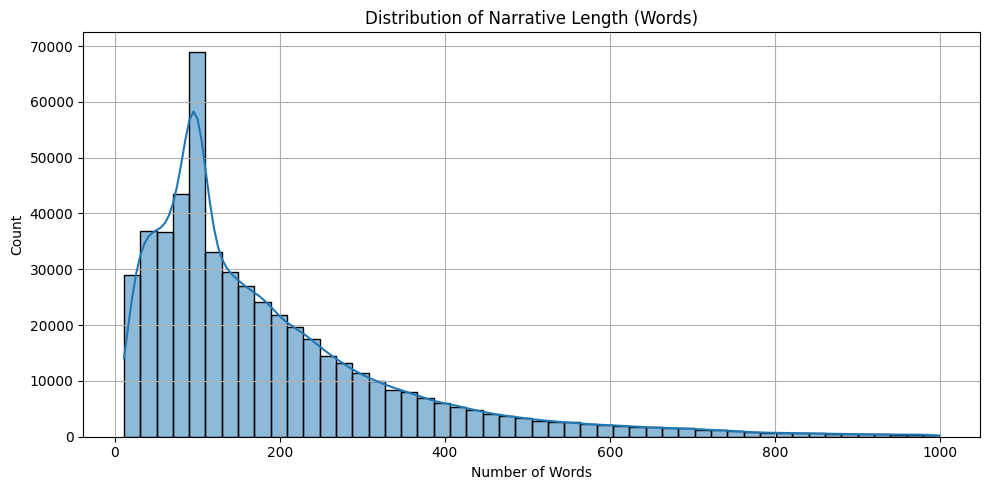

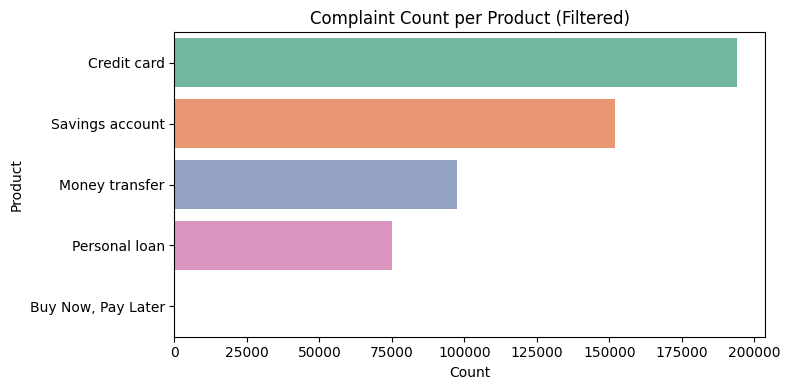

In [ ]:
import sys
sys.path.append("..")
# we dont have BNPl(Buy Now, Pay Later (BNPL) product raws) but still we are rechecking from natative columns
from src.data_preprocessing import run_preprocessing
df_clean = run_preprocessing()
df_clean.head()

###  **EDA & Preprocessing Summary — Task 1**

We processed **9.6 million customer complaint records** from the CFPB dataset to prepare high-quality input for our RAG-powered chatbot.

####  Key Highlights:

* **Total complaints processed:** 9,609,797
* **Complaints with narratives:** 2,980,756
* **Complaints without narratives:** 6,629,041
* **Complaints retained after filtering and cleaning:** 455,899

#### Target Product Categories:

Our focus was on the following five financial products:

* Credit card
* Personal loan
* Buy Now, Pay Later (BNPL)
* Savings account
* Money transfers

However, **no complaints related to Buy Now, Pay Later (BNPL)** were found in this dataset version. The final dataset includes only **4 out of 5 target categories**.

####  Final Product Distribution (Filtered):

| Product         | Complaints |
| --------------- | ---------- |
| Credit card     | 186,339    |
| Savings account | 137,275    |
| Money transfer  | 97,303     |
| Personal loan   | 34,982     |

####  Cleaning & Filtering Logic:

To improve embedding quality and relevance:

* Removed rows without complaint narratives.
* Mapped raw product names to target categories.
* Filtered out short or excessively long narratives.
* Applied basic text cleaning: lowercasing, special character removal, whitespace cleanup.

####  Visualizations:

* A histogram showing the distribution of narrative lengths was saved to `notebooks/plots/narrative_length_distribution.png`.
* A bar chart of complaint volume per product was saved to `notebooks/plots/complaint_distribution_by_product.png`.

The cleaned dataset (`filtered_complaints.csv`) is now ready for chunking, embedding, and semantic search in Task 2.
